# ENN583 - Week 1 - Practical

Welcome to the first Prac session of ENN583. In this notebook, we will explore working with two computer vision / image processing libraries, OpenCV and Scikit-Image.


## Working with OpenCV

Learn how to load an image with OpenCV and display it using Matplotlib.

(-0.5, 1099.5, 732.5, -0.5)

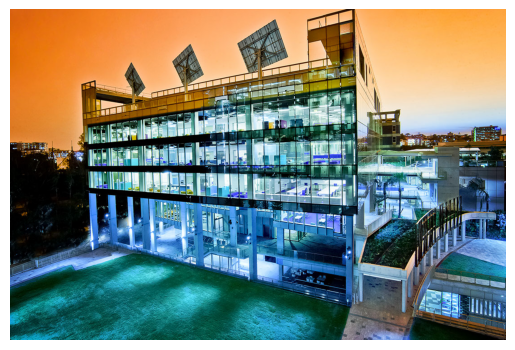

In [2]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

# open an image from the data folder
img = cv2.imread('data/qut_01.jpg')

# use pyplot to show the image
plt.imshow(img)
plt.axis('off')


Do you notice how the colours in the image look a bit strange? This is because OpenCV stores the images in BGR order (blue-green-red) instead of the more common RGB order. 

The `imshow` function expects images in RGB format, and therefore misinterprets the red channel as the blue channel and vice versa.

There is an easy way to fix this, by converting the image into a different format. 


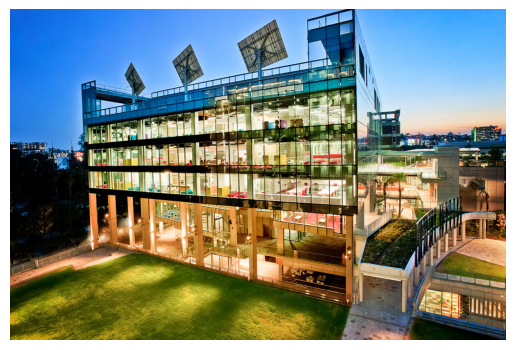

In [3]:
# correct the color space
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


If we check the type of the `img` variable, we discover that it is actually a `numpy` `ndarray`. We can use that to directly manipulate the image content if we want:

The img variable is of type <class 'numpy.ndarray'>.
The img variable has shape (733, 1100, 3).


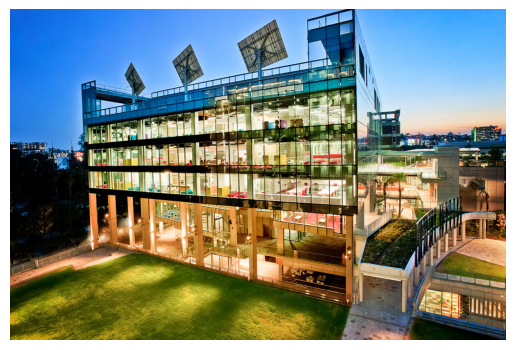

In [4]:
# how big is the image and what type is it?
print(f'The img variable is of type {type(img)}.')
print(f'The img variable has shape {img.shape}.')

# a different way of inverting the order of the colour channels, without calling cvtColor
plt.imshow(img[:,:,::-1])   # do you understand what this is doing? [:,:,::-1] reverses the order of the colour channels
plt.axis('off')
plt.show()


Here is how we can resize the image.

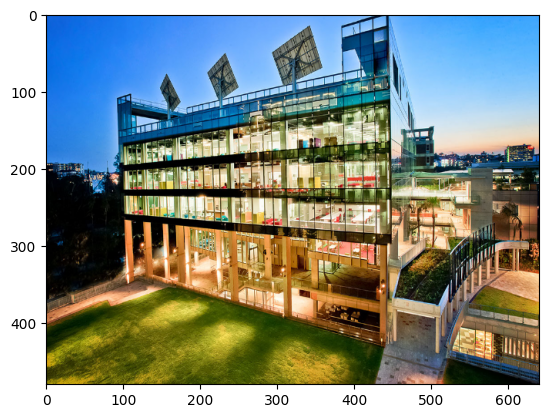

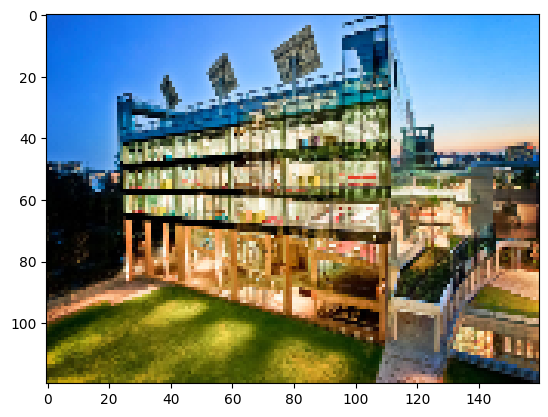

In [5]:
# resize the image to 640x480
img_small = cv2.resize(img, (640, 480))
plt.imshow(img_small[:,:,::-1])
plt.show()

# resize the image further by a factor of 0.25
img_tiny = cv2.resize(img_small, (0,0), fx=0.25, fy=0.25)
plt.imshow(img_tiny[:,:,::-1])
plt.show()

## Your turn!

To familiarise yourself further with the OpenCV library, work through the following tasks. Consult the documentation https://docs.opencv.org/4.7.0/ to find suitable functions and their paramters.

- Filter the image `img` with a 11x11 Gaussian blur filter and display the result. Try some other filters such as the median filter.
- Convert the image into grey scale and display the result. Save it in a variable called `img_grey`.
- Apply the Sobel filter to `img_grey` to highlight horizontal and vertical edges. Consult OpenCV's documentation to learn more about the Sobel filter and how to call it. Display the results of the horizontal and vertical Sobel filter separately.
- Now filter the image with a Gaussian blur filter and apply the Sobel filter to the blurred image. Compare to the previous results. What do you notice?
- A nother way of obtaining edge information is to calculate the Difference of Gaussian (DoG). 
  - To do that, take `img_grey` and apply a Gaussian filter with kernel size (3,3). 
  - Store the result in a new variable (`g1`). 
  - Then filter `img_grey` with a Gaussian with a bigger kernel, e.g. (5,5). Again, store the result in a new variable `g2`. 
  - Then subtract the two filtered images from each other (`g1` - `g2`) and display the results.
  - Pay special attention to the datatype of the images `g1` and `g2` and how that affects the subtraction.
  - Try different kernel sizes.
- Use the `glob` module to find all images in the `data` folder. Then open all images and display them side-by-side.


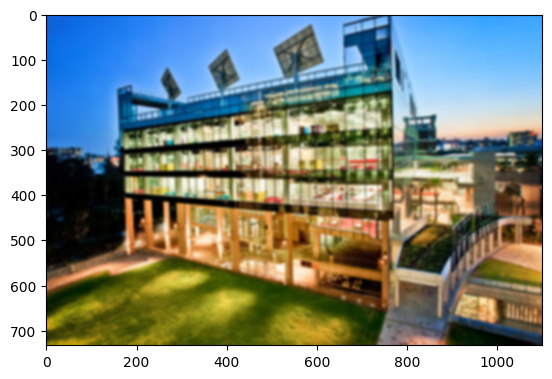

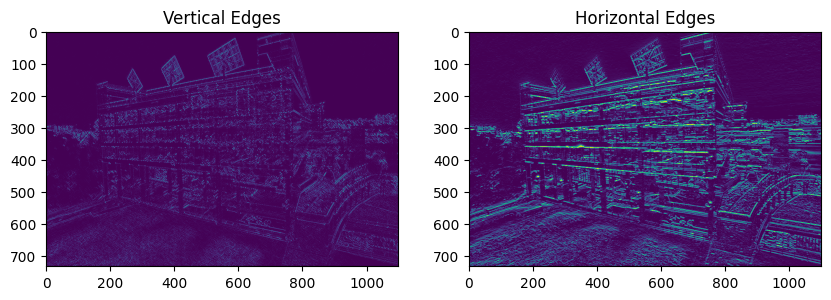

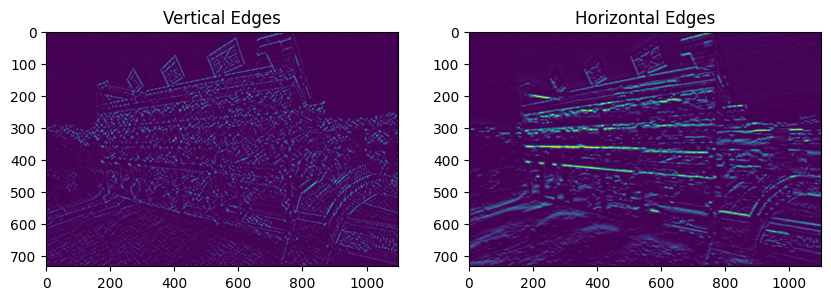

In [6]:
# continue working here
plt.imshow(cv2.cvtColor(cv2.GaussianBlur(img, ksize=(11,11), sigmaX=3), cv2.COLOR_BGR2RGB))

img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## Sobel
def SobelPlot(img):
    sobel_vert = cv2.Sobel(img, -1, 1, 0)
    sobel_horiz = cv2.Sobel(img, -1, 0, 1)
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Display the first image on the left subplot
    axes[0].imshow(sobel_vert)
    axes[0].set_title('Vertical Edges')

    # Display the second image on the right subplot
    axes[1].imshow(sobel_horiz)
    axes[1].set_title('Horizontal Edges')

# grayscale
SobelPlot(img_grey)
# grayscale, 11x11 Gaussian
SobelPlot(cv2.GaussianBlur(img_grey, ksize=(11,11), sigmaX=2))


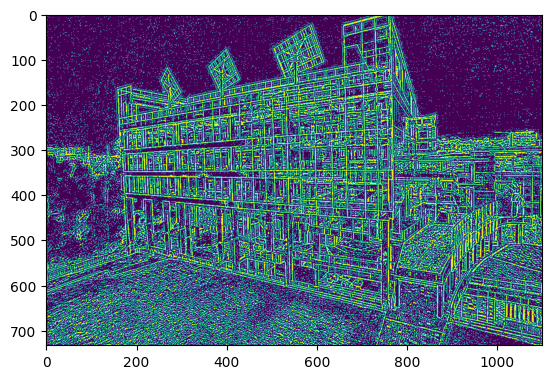

In [7]:

# Difference of Gaussian (DoG)
g1 = cv2.GaussianBlur(img_grey, ksize=(3,3), sigmaX=1)
g2 = cv2.GaussianBlur(img_grey, ksize=(5,5), sigmaX=1)
plt.imshow(g1-g2)
plt.show()

## Working with Scikit-Image

Scikit-Image is a nother widely used computer vision library for Python.

You can access its documentation here: https://scikit-image.org/docs/stable/

Here are some basic examples that demonstrate its use.

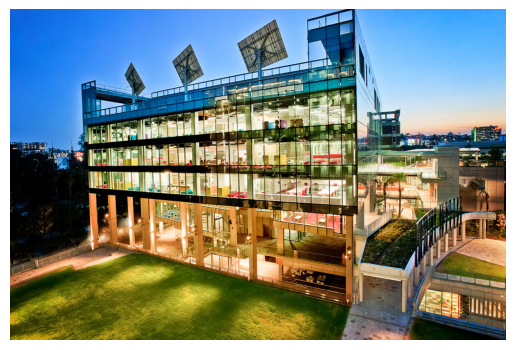

The img variable is of type <class 'numpy.ndarray'>.


In [8]:
import skimage as ski
import numpy as np

# open an image from the data folder
img = ski.io.imread('data/qut_01.jpg')

# use pyplot to show the image
plt.imshow(img)
plt.axis('off')
plt.show()

print(f'The img variable is of type {type(img)}.')  # skimage also gives us images as a numpy ndarray

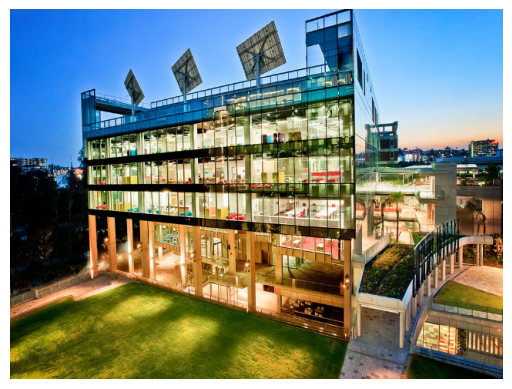

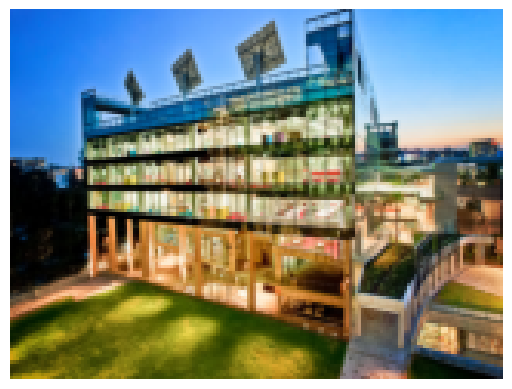

In [9]:
# resize the image to 640x480
img_small = ski.transform.resize(img, (480, 640))   # skimage uses (y, x) order for image dimensions
plt.imshow(img_small)
plt.axis('off')
plt.show()

# resize the image further by a factor of 0.25
img_tiny = ski.transform.rescale(img_small, 0.25, channel_axis=2) # channel_axis=2 tells skimage that the colour channels are the last dimension
plt.imshow(img_tiny)
plt.axis('off')
plt.show()

## Your turn!

Repeat the same experiments you did with OpenCV above, but use the Scikit-Image library. Which library suits you more, which do you find more easy to use?

/tmp/ipykernel_45695/2043953452.py:2: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  plt.imshow(ski.filters.gaussian(img, sigma=2))


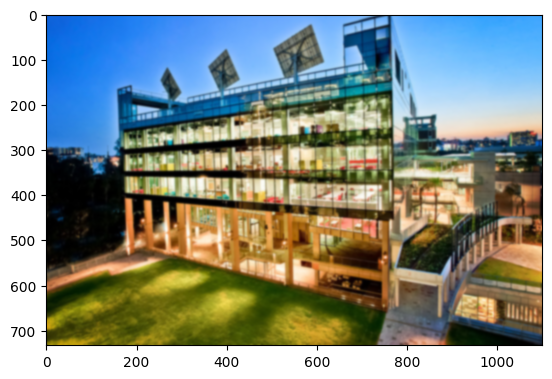

In [10]:
# continue working here
plt.imshow(ski.filters.gaussian(img, sigma=2))


## Which Library is more Efficient?

Now you have seen that there are at least two capable libraries available in Python that can do the image processing and computer vision you will need in ENN583.

Let's figure out which of them is more efficient and can execute common routines faster.

Use the `%time` and `%timit` magic commands in Jupyter to measure how long a certain functions take. Make sure to check the Gaussian blur and the Sobel filters.

Here is an example:
- `%time cv2.resize(img, (640, 480))` will execute the `resize` function *once* and tell you how long it took to execute: `CPU times: user 1.09 ms, sys: 1.27 ms, total: 2.36 ms`
- To get more reliable measurements, the more sophisticated `%timeit` command executes the function *multiple* times. Make sure to read the documentation https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit to see and understand all the options. A typical return will look like this: `326 µs ± 19.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)`. 


In [11]:
# continue working here